# Маркетинговый анализ развлекательного приложения Procrastinate Pro+. 

Несколько прошлых месяцев бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Нужно разобраться в причинах этой ситуации.
У нас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Нужно изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.



## Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


- У нас 309901 строчка, 6 столбцов, пропусков нет, два типа данных. Посмотрим первые пять строчек фрейма

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Нужно сменить данные в датах.

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


- Здесь у нас 40212 строк, 3 столбца, 3 типа данных, без пропусков

In [5]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Нужно будет тоже сменить тип данных в столбце с датой

In [6]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [7]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Здесь у нас 1800 строк, пропусков вроде нет, 3 столбца и два типа данных. Дату тоже нужно привести к другому типу

Итак, мы загрузили три файла и посмотрели информацию о них. Теперь заменим тип данных

In [8]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])


In [9]:
#приведем все названия колонок к нижнему регистру
costs.columns = costs.columns.str.lower()
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()


In [10]:
#переименуем некоторые столбцы
visits= visits.rename(columns={'user id':'user_id', 'session start':'session_start', 'session end':'session_end'})
orders = orders.rename(columns={'user id': 'user_id', 'event dt': 'event_dt'})

**Пропуски**

In [11]:
#пропусков вроде не было, но стоит проверить
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [12]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [13]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

**Дубликаты**

In [14]:
#идем на поиски дубликатов
visits.duplicated().sum()

0

In [15]:
orders.duplicated().sum()

0

In [16]:
costs.duplicated().sum()

0

Поменяли типы данных колонок, связанных с датами. Привели все названия к нижнему регистру и переименовали некотрые колонки.

**Описание данных**

Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

## Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

In [17]:
def get_profiles(sessions, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

profiles = get_profiles(visits, orders, costs)

profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [18]:
#коэффициент удержания

def get_retention(
    profiles, visits, observation_date, horizon_days, ignore_horizon=False
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby('dt')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on='dt', how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped



# доступный интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()  # момент анализа

# горизонт анализа
analysis_horizon = 14

retention_raw, retention = get_retention(
    profiles, visits, observation_date, analysis_horizon)
retention.head()

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
dt,,,,,,,,,,,,,,,
2019-05-01,909,1.0,0.204620,0.089109,0.064906,0.039604,0.030803,0.029703,0.023102,0.026403,0.017602,0.016502,0.019802,0.013201,0.008801
2019-05-02,758,1.0,0.200528,0.118734,0.056728,0.046174,0.027704,0.023747,0.023747,0.017150,0.011873,0.021108,0.014512,0.019789,0.010554
2019-05-03,849,1.0,0.190813,0.111896,0.064782,0.042403,0.051826,0.029446,0.028269,0.021201,0.015312,0.016490,0.014134,0.009423,0.011779
2019-05-04,1015,1.0,0.193103,0.106404,0.079803,0.042365,0.029557,0.029557,0.017734,0.025616,0.017734,0.017734,0.019704,0.008867,0.016749
2019-05-05,970,1.0,0.203093,0.106186,0.075258,0.041237,0.028866,0.024742,0.022680,0.016495,0.007216,0.015464,0.011340,0.015464,0.008247


In [19]:
def get_retention_d(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],  # новый параметр dimensions
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    # новый вариант с dimensions
    result_grouped = result_raw.pivot_table(
        index=dimensions,  # заменили dt
        columns='lifetime',
        values='user_id',
        aggfunc='nunique',
    )
    cohort_sizes = (
        result_raw.groupby(dimensions)  # заменили dt
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'  # заменили dt
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

result_raw, result_grouped = get_retention_d(
    profiles,
    visits,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['payer'],  # новый параметр dimensions
)
result_grouped

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,,
False,134200,1.0,0.176811,0.086356,0.051468,0.034493,0.024516,0.018443,0.013994,0.011818,0.009478,0.007750,0.006610,0.005872,0.004575
True,8420,1.0,0.404751,0.316746,0.259739,0.226841,0.209264,0.187767,0.173634,0.162589,0.150950,0.149406,0.137173,0.133373,0.121496


In [20]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

horizon_days = 14
result_raw, result_grouped, result_in_time = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days)
result_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,138765,0.040824,0.046683,0.049458,0.051468,0.052917,0.053832,0.054603,0.055324,0.055864,0.056376,0.056657,0.056895,0.05706,0.057284


In [21]:
def get_ltv(
    profiles,  
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 3. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 4. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 5. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 6. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 7. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу LTV
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицу динамики LTV
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы LTV и сырые данные
    return result_raw, result_grouped, result_in_time

result_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,138765,0.040824,0.046683,0.049458,0.051468,0.052917,0.053832,0.054603,0.055324,0.055864,0.056376,0.056657,0.056895,0.05706,0.057284


In [22]:
def get_ltv_roi(profiles, purchases, observation_date, horizon_days, dimensions = [], ignore_horizon = False):


    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Присоединить покупки к профилям пользователей и расчитать для каждой покупки время жизни пользователя (lifetime)
    # формируем массив сырых данных
    result_raw = result_raw.merge(purchases[['user_id', 'event_dt', 'revenue']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days

    # этот столбец мы будем использовать для группировки в случае, когда в dimensions ничего не передано
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):
        # Шаг 3. Построить сводную таблицу, у которой в строках находятся даты первой посещения пользователей, в столбцах - lifetime, а в ячейках сумма покупок пользователей на заданный лайфтайм. Таким образом, мы получим таблицу выручки
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'revenue', aggfunc = 'sum')         # строим "треугольную таблицу"

        # Шаг 4. Просуммировать ячейки таблицы конверсии вдоль каждого ряда с накоплением
        result = result.fillna(0).cumsum(axis = 1)

        # Шаг 5. Расчитать размеры когорт и соединить таблицы размеров когорт и таблицу конверсии
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице

        # Шаг 6. Разделить каждую ячейку таблицы выручки на соответствующий размер когорты
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1

        # Шаг 7. Расчитать CAC
        # в таблице df одному пользователю соответствует несколько строк, поэтому
        # вернемся к уникальным пользователям с помощью drop_duplicates
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = cac.groupby(dims).agg({'acquisition_cost': 'mean'}).rename(columns = {'acquisition_cost': 'cac'})

        # Шаг 8. Разделить LTV на CAC
        roi = result.div(cac['cac'], axis = 0)

        # Шаг 9. Исключить из результатов строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # добавим красивости - починим размеры когорт и добавим в таблицу cac
        # и выведем все в формате cohort_size, cac, все остальные столбцы
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    # расчитываем LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # рассчитываем LTV и ROI по всем параметрам + дата
    if 'cohort' in dimensions: dimensions = []  # здесь у нас есть дополнительное измерение - дата, поэтому cohort больше не понадобится
    result_in_time, roi_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # возвращаем и таблицы LTV, ROI и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time
    
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv_roi(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14)

roi_grouped

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,142620,0.694753,0.347269,0.447504,0.524031,0.58821,0.644131,0.69364,0.738771,0.779386,0.819299,0.855793,0.889256,0.920855,0.951833,0.979855


In [23]:
ltv_raw, ltv, ltv_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14
)

## Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [24]:
#строим профили
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [25]:
#самая ранняя дата привлечения
profiles['dt'].min()

datetime.date(2019, 5, 1)

In [26]:
#последняя дата привлечения
profiles['dt'].max()

datetime.date(2019, 10, 27)

In [27]:
#всего платящих
profiles.groupby('payer').count()

,user_id,first_ts,channel,device,region,dt,month,acquisition_cost
payer,,,,,,,,
False,141127,141127,141127,141127,141127,141127,141127,141127
True,8881,8881,8881,8881,8881,8881,8881,8881


Платящих пользователей 8881 всего

**Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?**

In [28]:
profiles['region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

In [29]:
profiles.groupby('region').sum().sort_values('payer')

,user_id,payer,acquisition_cost
region,,,
Germany,7500868654706280,616,4424.223235
France,8721079260394761,663,5075.973946
UK,8730498320190994,700,5068.502819
United States,49950116036552088,6902,90928.600000


<AxesSubplot:ylabel='payer'>

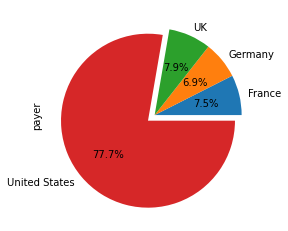

In [30]:
explode = (0, 0, 0, 0.1)
profiles.groupby('region').sum().plot(y='payer', kind='pie', explode=explode, autopct='%1.1f%%', legend=False)

In [31]:
region = profiles.pivot_table(index='region', values='payer', aggfunc=['sum','count','mean']).reset_index()
region

,region,sum,count,mean
,,payer,payer,payer
0,France,663,17450,0.037994
1,Germany,616,14981,0.041119
2,UK,700,17575,0.039829
3,United States,6902,100002,0.069019


Заметно, что у United States большой отрыв - 6,9% платящих пользователей. Меньше всего у Франции - 5%

Всего у нас 4 страны United States, France, Germany и UK. Больше всего платящих пользователей из United States - 77,7%

**Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?**

In [32]:
profiles['device'].unique()

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

In [33]:
profiles.groupby('device').sum().sort_values('payer')

,user_id,payer,acquisition_cost
device,,,
PC,15200801593417964,1537,15263.344712
Mac,15046944881398228,1912,24094.537878
Android,17459821335133222,2050,22460.629159
iPhone,27194994461895148,3382,43678.788251


<AxesSubplot:ylabel='payer'>

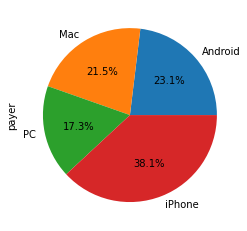

In [34]:
profiles.groupby('device').sum().plot(y='payer', kind='pie', autopct='%1.1f%%', legend=False)

Устройства: Mac, iPhone, PC, Android. Больше всего пользователей с iPhone - 38,1%

In [35]:
device = profiles.pivot_table(index='device', values='payer', aggfunc=['sum','count','mean']).reset_index()
device

,device,sum,count,mean
,,payer,payer,payer
0,Android,2050,35032,0.058518
1,Mac,1912,30042,0.063644
2,PC,1537,30455,0.050468
3,iPhone,3382,54479,0.062079


С Mac заходит больше всего платящих пользователей (8,9%), чем с PC (6,7%)

**По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?**

In [36]:
profiles['channel'].unique()

array(['FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [37]:
profiles.groupby('channel').sum().sort_values('payer')

,user_id,payer,acquisition_cost
channel,,,
MediaTornado,2217083852497856,156,954.48
YRabbit,2143810696485552,165,944.22
lambdaMediaAds,1037457796359666,225,1557.60
OppleCreativeMedia,4290110637528591,233,2151.25
LeapBob,4288996831818403,262,1797.60
RocketSuperAds,2231345012998483,352,1833.00
AdNonSense,1959480189776244,440,3911.25
WahooNetBanner,4255663316033473,453,5151.00
organic,28163765765644108,1160,0.00


<AxesSubplot:ylabel='payer'>

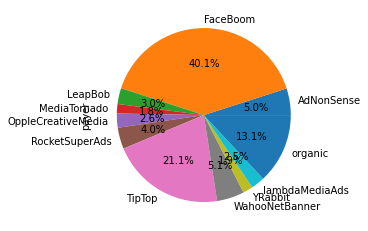

In [38]:
profiles.groupby('channel').sum().plot(y='payer', kind='pie', autopct='%1.1f%%', legend=False)

Лидирует FaceBoom с большим отрывом. 

In [39]:
channels = profiles.pivot_table(index='channel', values='payer', aggfunc=['sum','count','mean']).reset_index()
channels

,channel,sum,count,mean
,,payer,payer,payer
0,AdNonSense,440,3880,0.113402
1,FaceBoom,3557,29144,0.122049
2,LeapBob,262,8553,0.030633
3,MediaTornado,156,4364,0.035747
4,OppleCreativeMedia,233,8605,0.027077
5,RocketSuperAds,352,4448,0.079137
6,TipTop,1878,19561,0.096007
7,WahooNetBanner,453,8553,0.052964
8,YRabbit,165,4312,0.038265


Большой отрыв у AdNonSense, lambdaMediaAds и FaceBoom - 11,3% , 10,4%  и 12,2%. А меньше всего платящих пользователей приходит с OppleCreativeMedia - 2,7%. 

## Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [40]:
#общие затраты
costs['costs'].sum().round()

105497.0

In [41]:
#затраты по каждому источнику
costs.groupby('channel').sum().sort_values('costs')

,costs
channel,
YRabbit,944.22
MediaTornado,954.48
lambdaMediaAds,1557.60
LeapBob,1797.60
RocketSuperAds,1833.00
OppleCreativeMedia,2151.25
AdNonSense,3911.25
WahooNetBanner,5151.00
FaceBoom,32445.60


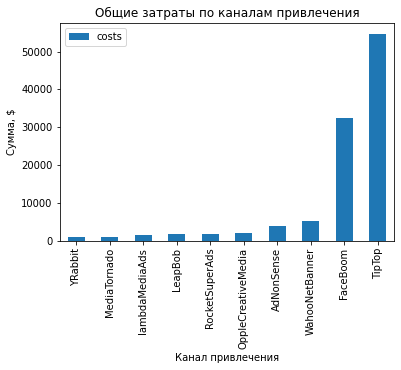

In [42]:
costs.groupby('channel').sum().sort_values('costs').plot(kind='bar')
plt.ylabel('Сумма, $')
plt.xlabel('Канал привлечения')
plt.title('Общие затраты по каналам привлечения')
plt.show()

Больше всего трат было на TipTop - 54751.30

In [43]:
profiles.groupby('month').sum().sort_values('acquisition_cost')

,user_id,payer,acquisition_cost
month,,,
2019-05-01,13528086077477268,1321,9978.570
2019-06-01,11576687405319144,1441,15090.045
2019-07-01,11329440732098208,1393,16447.060
2019-08-01,13263088328336284,1587,20657.870
2019-10-01,12081660898915224,1474,20882.415
2019-09-01,13123598829698300,1665,22441.340


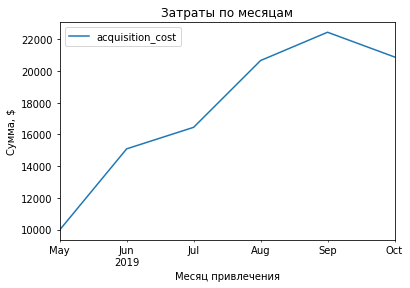

In [44]:
profiles.pivot_table(index='month', values='acquisition_cost', aggfunc='sum').plot(kind='line')
plt.ylabel('Сумма, $')
plt.xlabel('Месяц привлечения')
plt.title('Затраты по месяцам')
plt.show()

больше всего трат было в сентябре, но в целом август-октябрь примерно равны.

**Сколько в среднем стоило привлечение одного покупателя из каждого источника?**

In [45]:
profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean').sort_values('acquisition_cost')

,acquisition_cost
channel,
organic,0.000000
LeapBob,0.210172
MediaTornado,0.218717
YRabbit,0.218975
OppleCreativeMedia,0.250000
RocketSuperAds,0.412095
WahooNetBanner,0.602245
lambdaMediaAds,0.724802
AdNonSense,1.008054


In [46]:
#ВТОРОЙ СПОСОБ


# находим максимальную дату привлечения из сырых данных LTV
max_acquitision_dt = ltv_raw['dt'].max()
# отсекаем профили, которые «старше» этой даты
ltv_profiles = profiles.query('dt <= @max_acquitision_dt')

# оставшееся число пользователей на каждый лайфтайм
ltv_profiles.groupby('dt').agg({'user_id': 'nunique'})
# считаем средний CAC по каналам привлечения

cac = (
    ltv_profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
)

cac.sort_values('cac')

,cac
channel,
organic,0.000000
LeapBob,0.210000
YRabbit,0.217087
MediaTornado,0.219035
OppleCreativeMedia,0.249908
RocketSuperAds,0.417431
WahooNetBanner,0.601856
lambdaMediaAds,0.727237
AdNonSense,1.008023


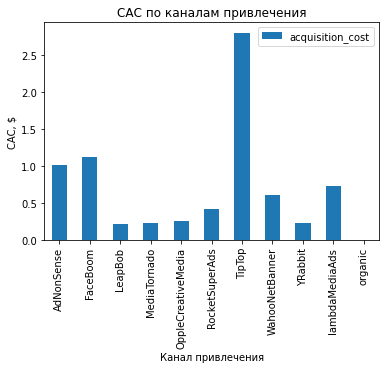

In [47]:
profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean').plot(kind='bar')
plt.ylabel('CAC, $')
plt.xlabel('Канал привлечения')
plt.title('САС по каналам привлечения')
plt.show()

Итак мы видим какие у нас есть каналы привлечения, сколько человек пришло с конкретного канала и сколько было затрачено на привлечение всех клиентов с канала и затраты на одного. Дороже всего клиенты, привлеченные с TipTop

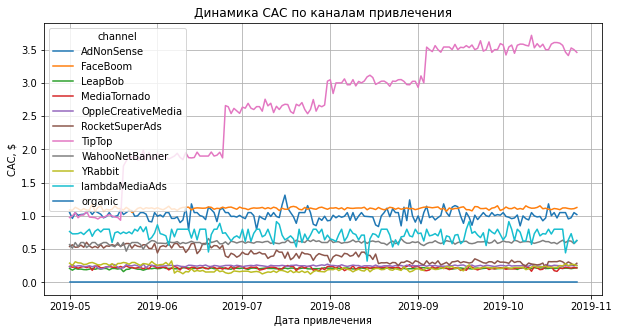

In [48]:
# строим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Стоимость привлечения «органических» пользователей во всех когортах равна нулю, потому что они перешли на сайт самостоятельно, а не благодаря рекламе. Привлечение через все каналы примерно одной стоимости, кроме растущей стоимости канала Tip Top

In [49]:
mean_cac = profiles.query('channel != "organic"')
mean_cac = mean_cac['acquisition_cost'].mean()
mean_cac.round(2)

1.13

Средняя стоимость привлечения одного пользователя - 1.13$

## Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

In [50]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

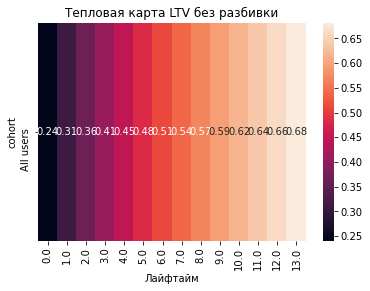

In [51]:
ltv_raw, ltv, ltv_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14
)
sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.2f')
plt.title('Тепловая карта LTV без разбивки')
plt.xlabel('Лайфтайм')
plt.show()

Двухнедельный LTV равен 68 центам

In [52]:
roi_grouped

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,142620,0.694753,0.347269,0.447504,0.524031,0.58821,0.644131,0.69364,0.738771,0.779386,0.819299,0.855793,0.889256,0.920855,0.951833,0.979855


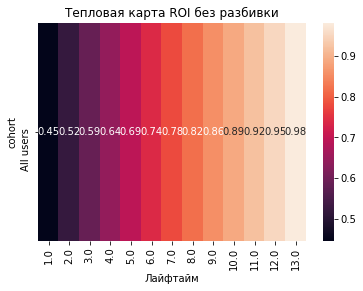

In [53]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv_roi(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14
)


sns.heatmap(roi_grouped.drop(columns=['cohort_size', 0, 'cac']), annot=True, fmt='.2f')
plt.title('Тепловая карта ROI без разбивки')
plt.xlabel('Лайфтайм')
plt.show()


Даже на 14 день реклама не окупилась до конца. Поэтому нельзя сказать об удачной рекламной компании в целом по всем источникам привлечения. 

In [54]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 


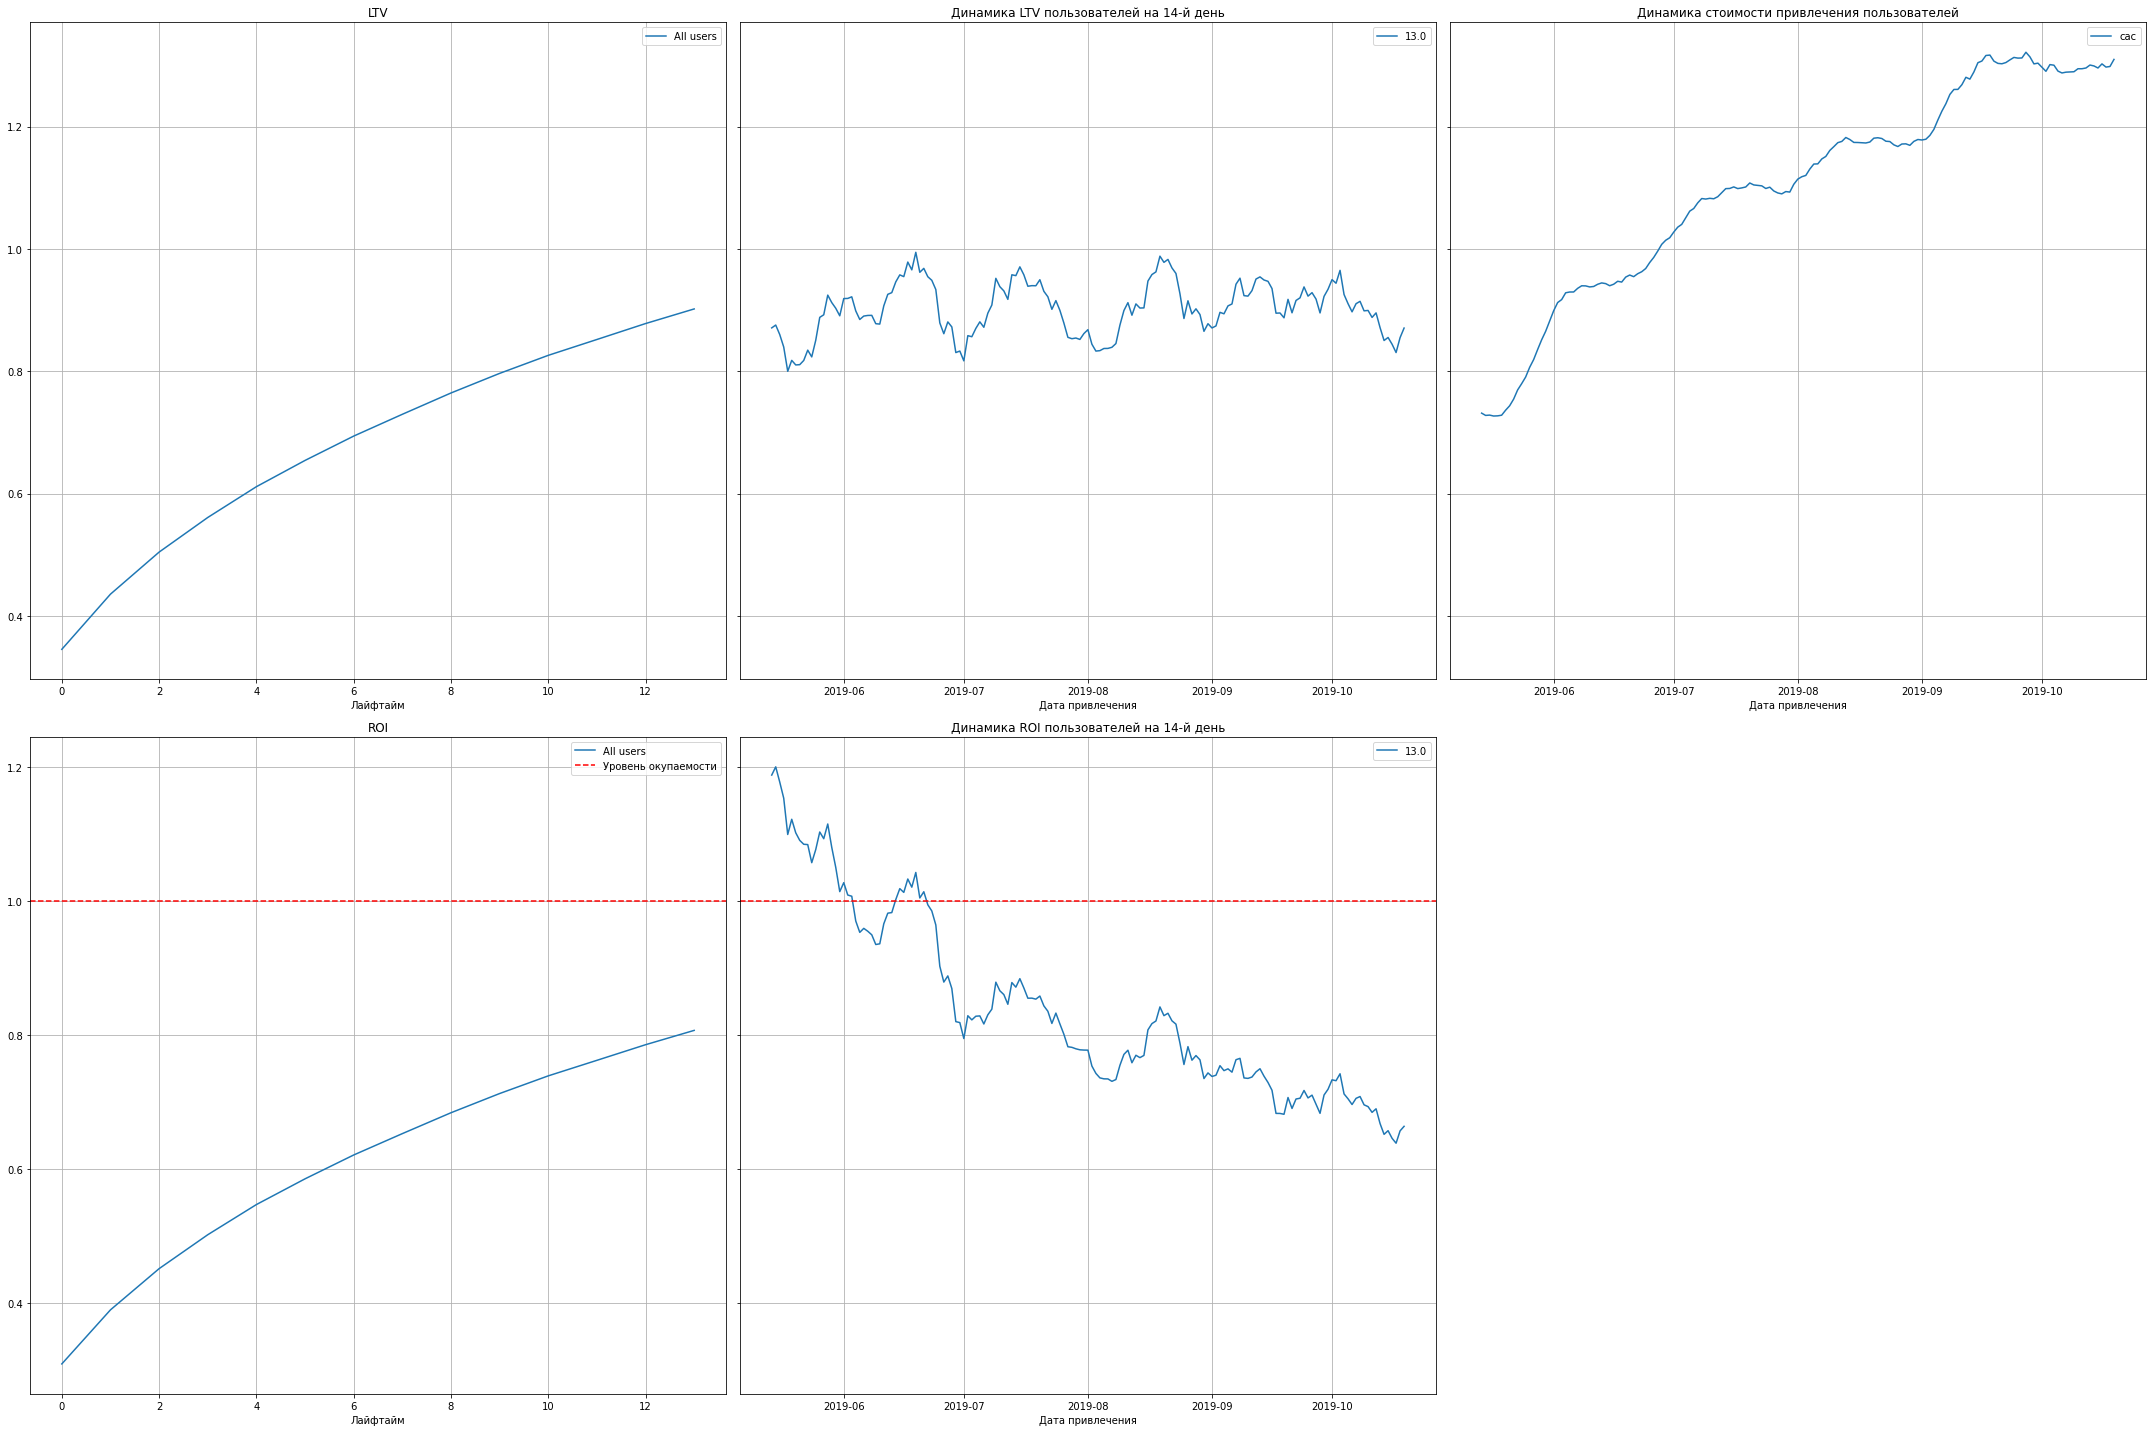

In [55]:
#визуализация 

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(30, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 
    
profiles = profiles.query('channel != "organic"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles, orders, observation_date, horizon_days
)

# строим графики

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 
    

По графикам можно сделать такие выводы:

*	Реклама не окупается. ROI в конце недели — почти подходит к 100%.
*	CAC не стабилен. Значит, возможно дело в увеличении рекламного бюджета.
*	На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.


Можно сделать вывод, что реклама окупалась не стабильно. Tip Top, на который было потрачено больше всего средств, не выходит за рамки уровня окупаемости. А вот канал YRabbit, MediaTornado часто пересекают границу и доходят до невероятных значений.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.
Начнём с разбивки по устройствам: передадим параметру dimensions столбец device.


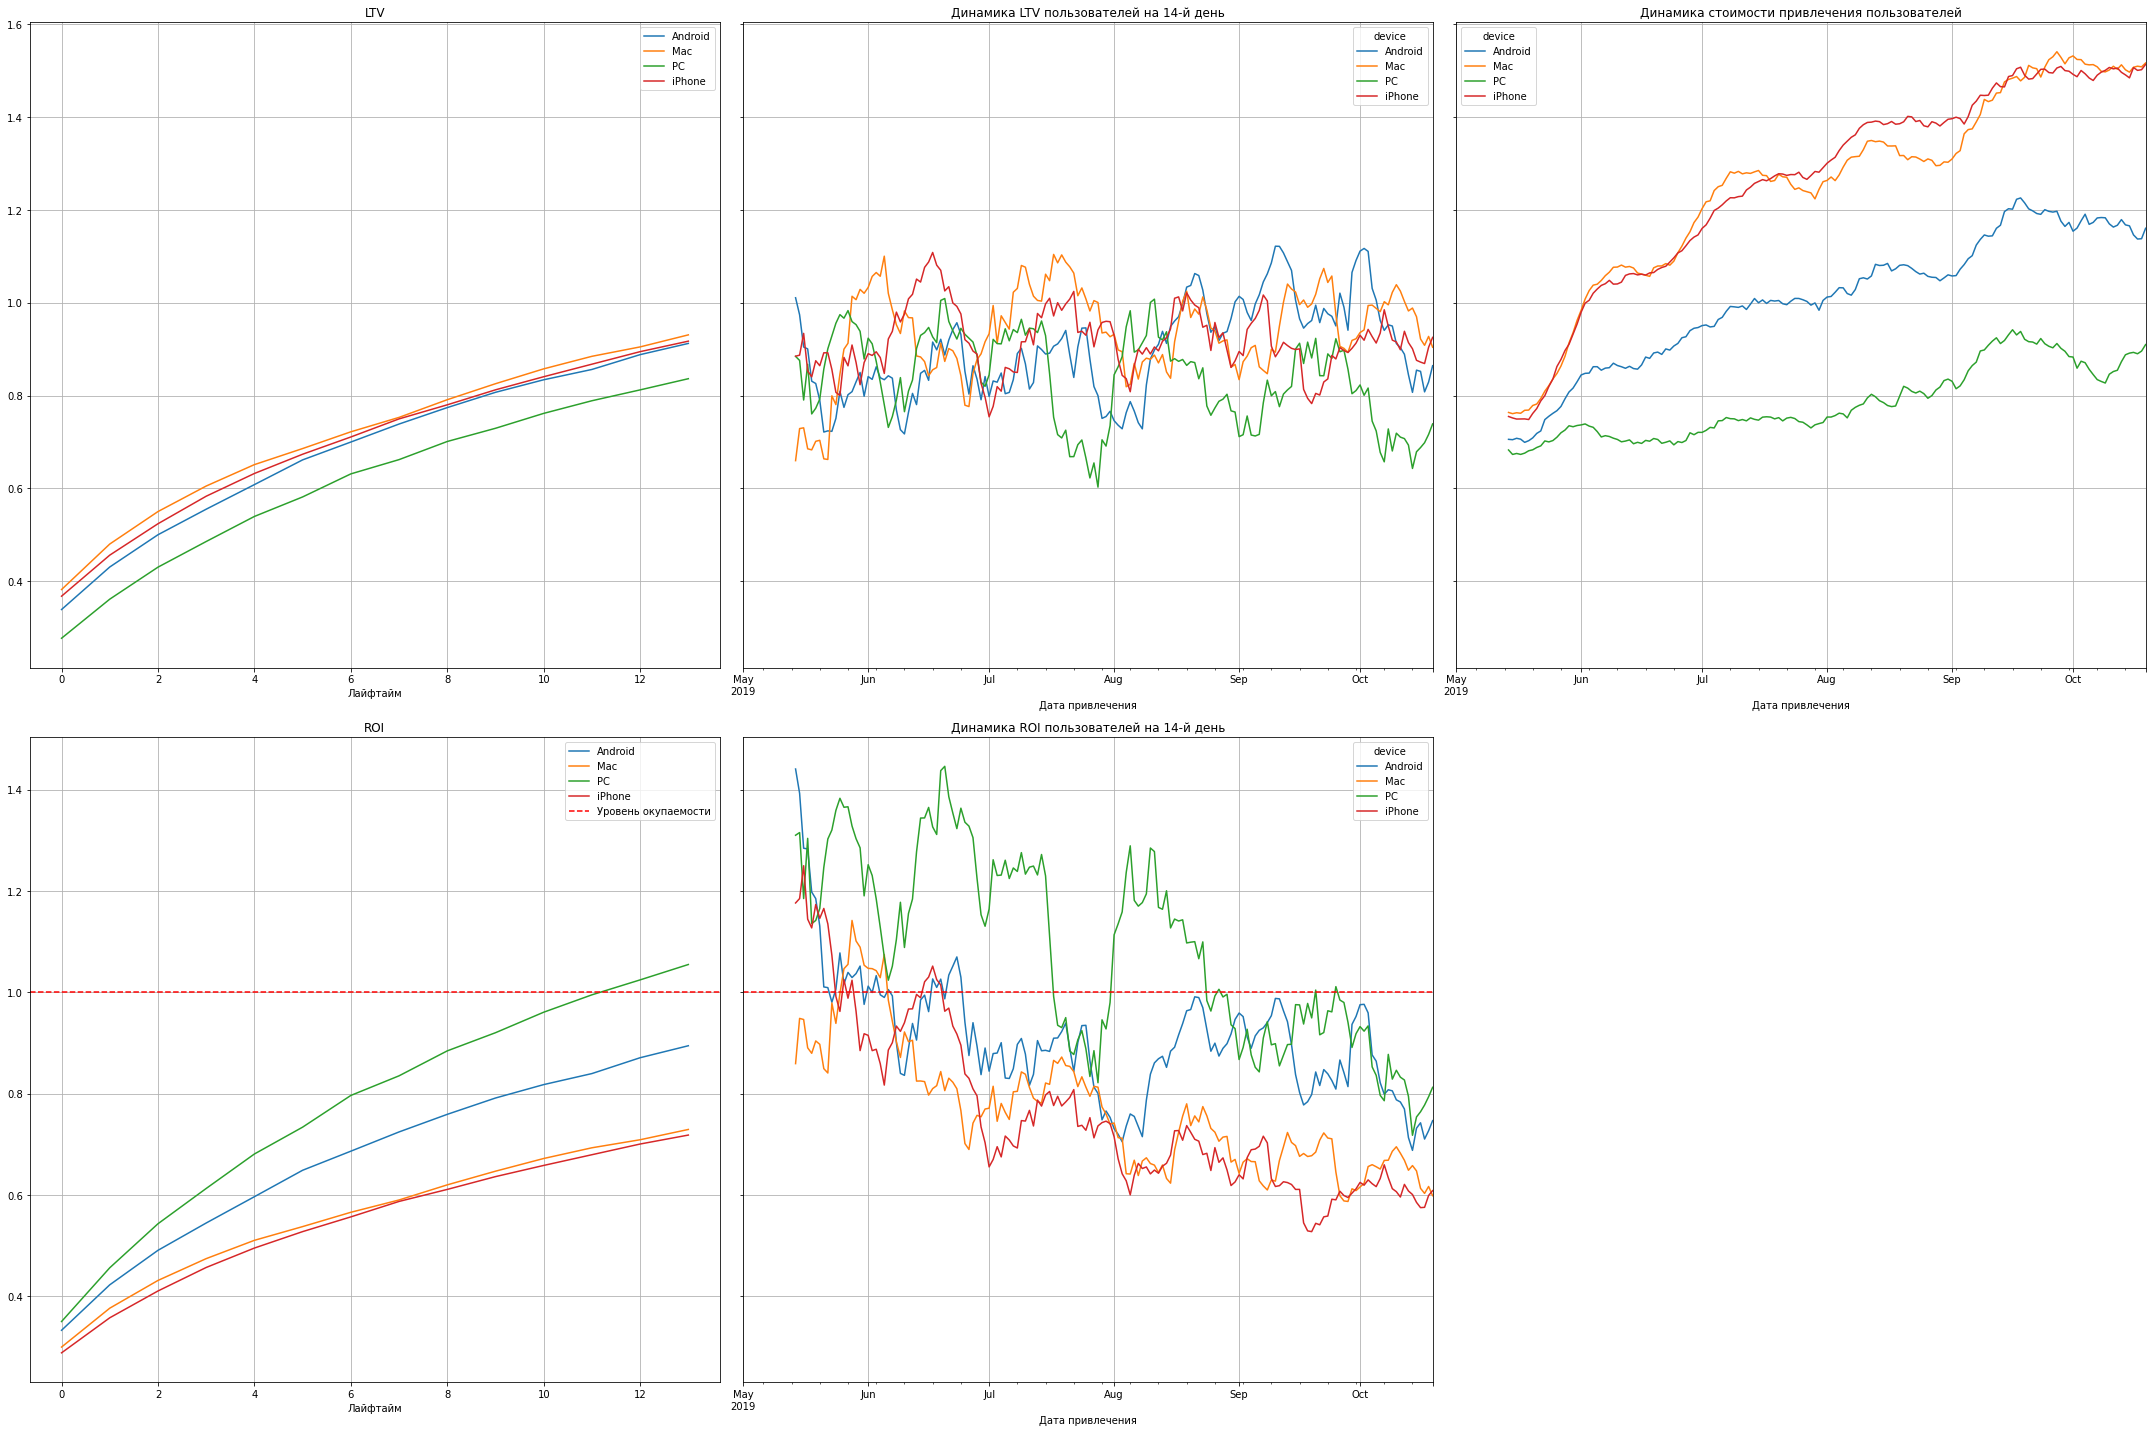

In [56]:
dimensions = ['device']
profiles = profiles.query('channel != "organic"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


- Судя по графикам, у пользователей iPhone "пожизненная ценность" выше. Но при этом ROI выше у пользователей PC.
- Стабильно не окупается реклама у Mac и iPhone. Хотя все показатели примерно на одном уровне. При этом эти два устройства приносят больше "ценности" для комании
- Единственный кто окупился хоть к концу периода - это PC




### Проанализируйте окупаемость рекламы с разбивкой по странам

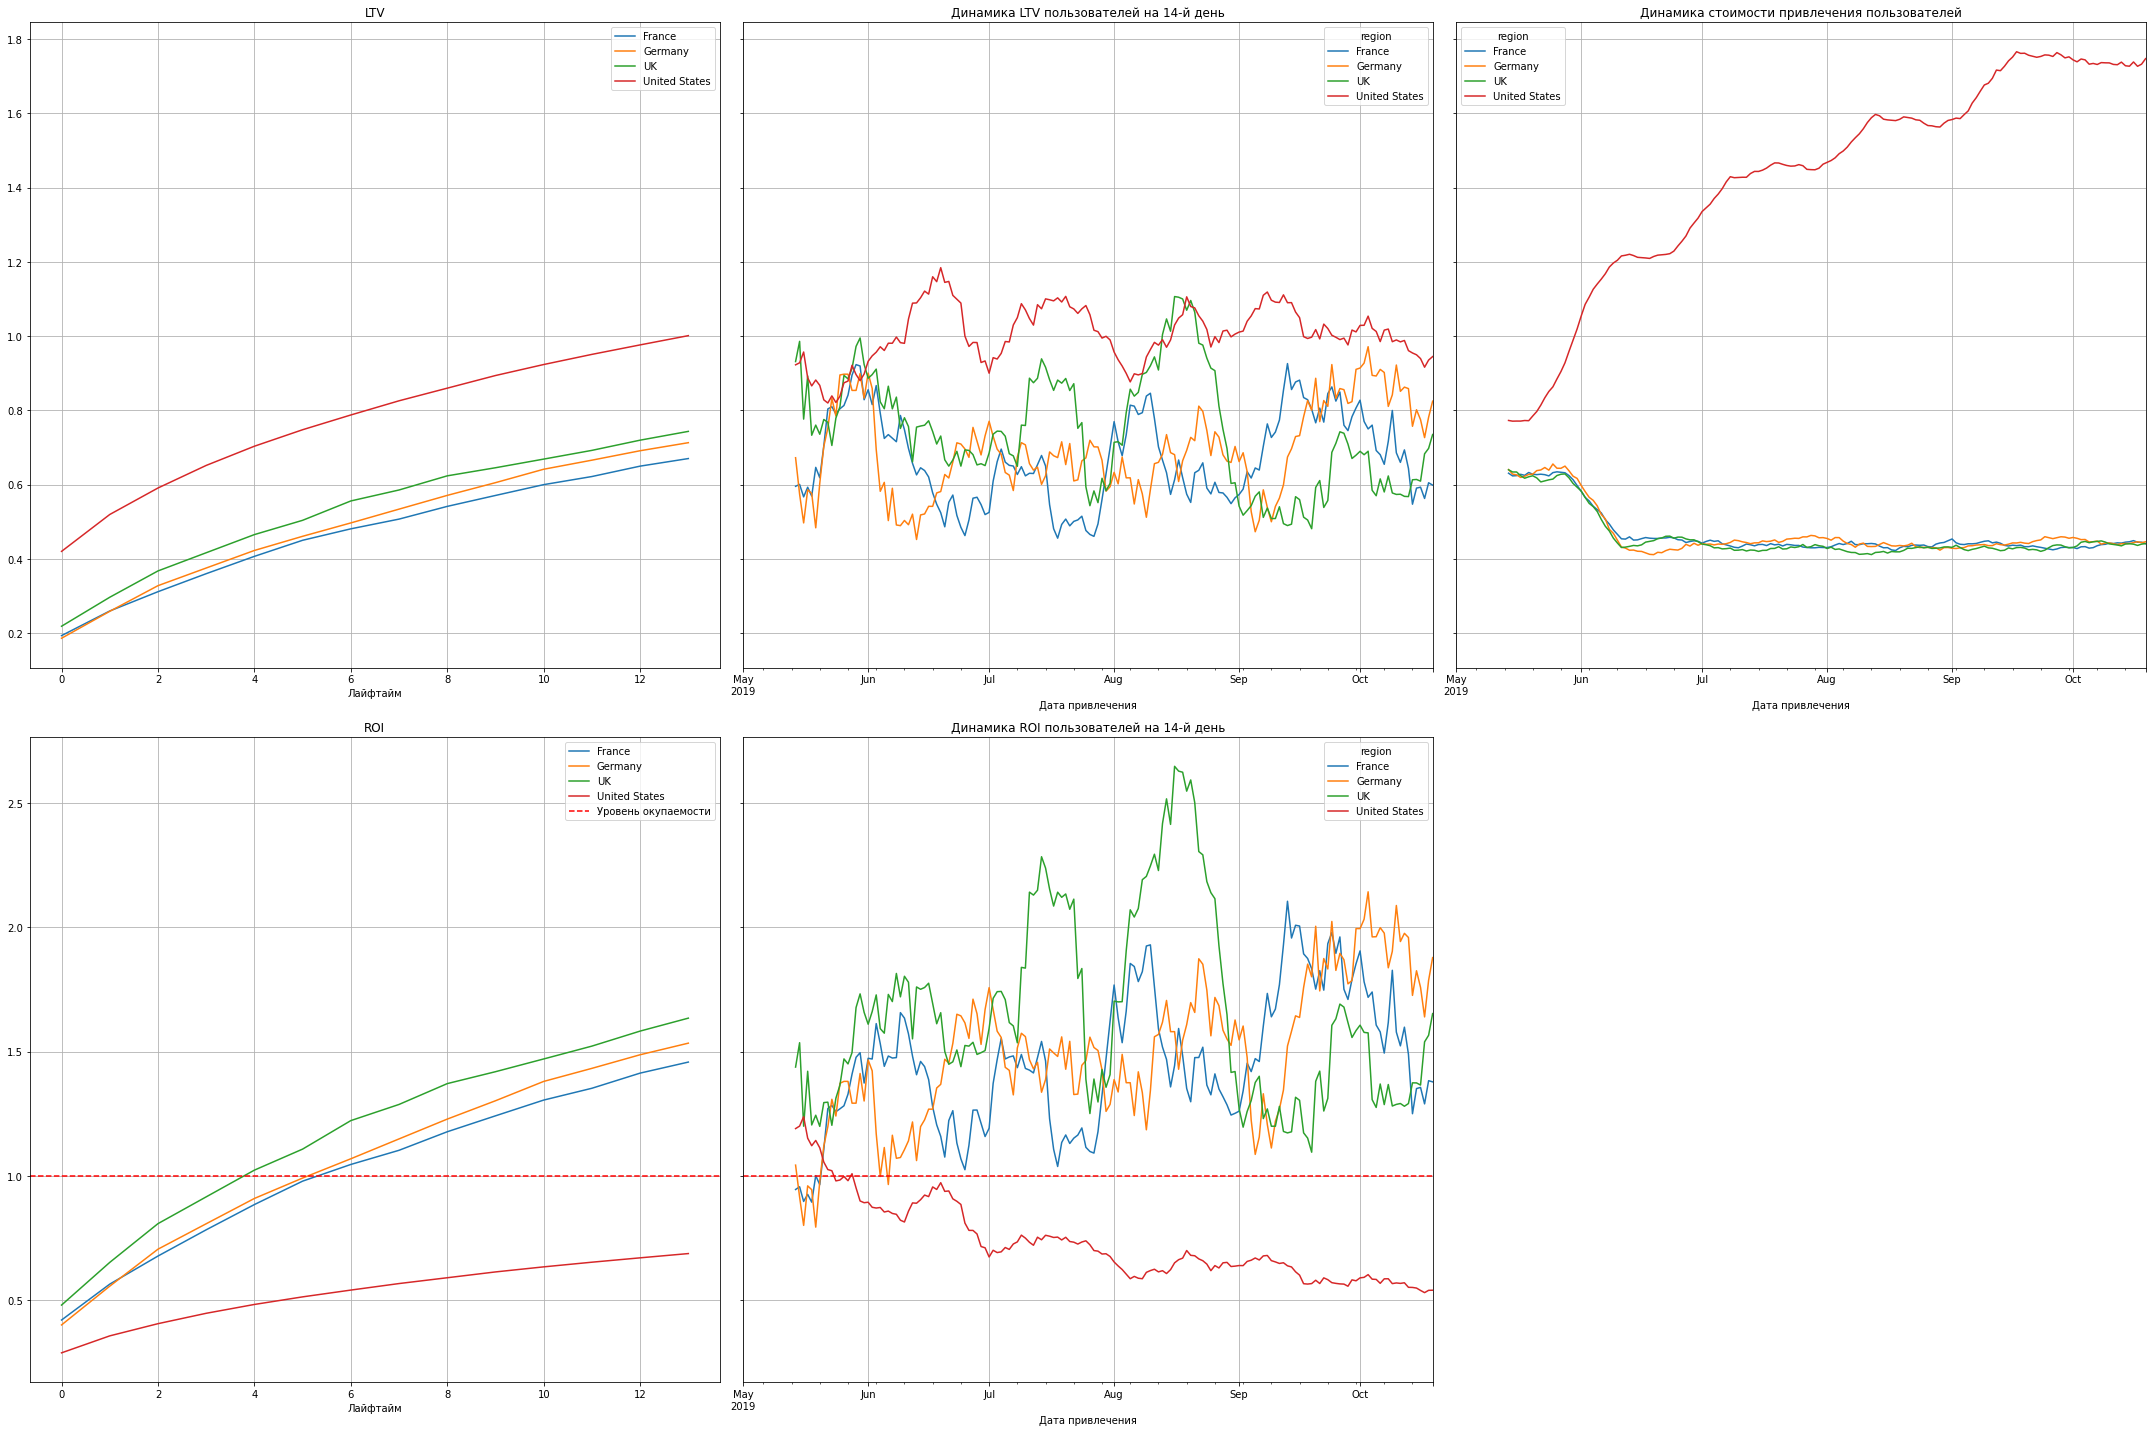

In [57]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']
profiles = profiles.query('channel != "organic"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


Вот что говорят графики:
*	Реклама не окупается в United States
*	Стоимость привлечения не стабильна, у United States сильное выделение увеличения САС. Остальные страны более менее в ровень 
*	LTV всё так же подвержен сезонности, но стабилен.
*	Лучше всего окупается UK а заработок больше с United States
*   В динамике ROI видно как у United States идет снижение, хотя по правилам этот показатель не может снижаться. Можно сделать вывод, что в этой стране произошло увеличение бюджета на привлечение и тем самым показатель снизился, а стоимость привлечения одного пользователя - увеличилась

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

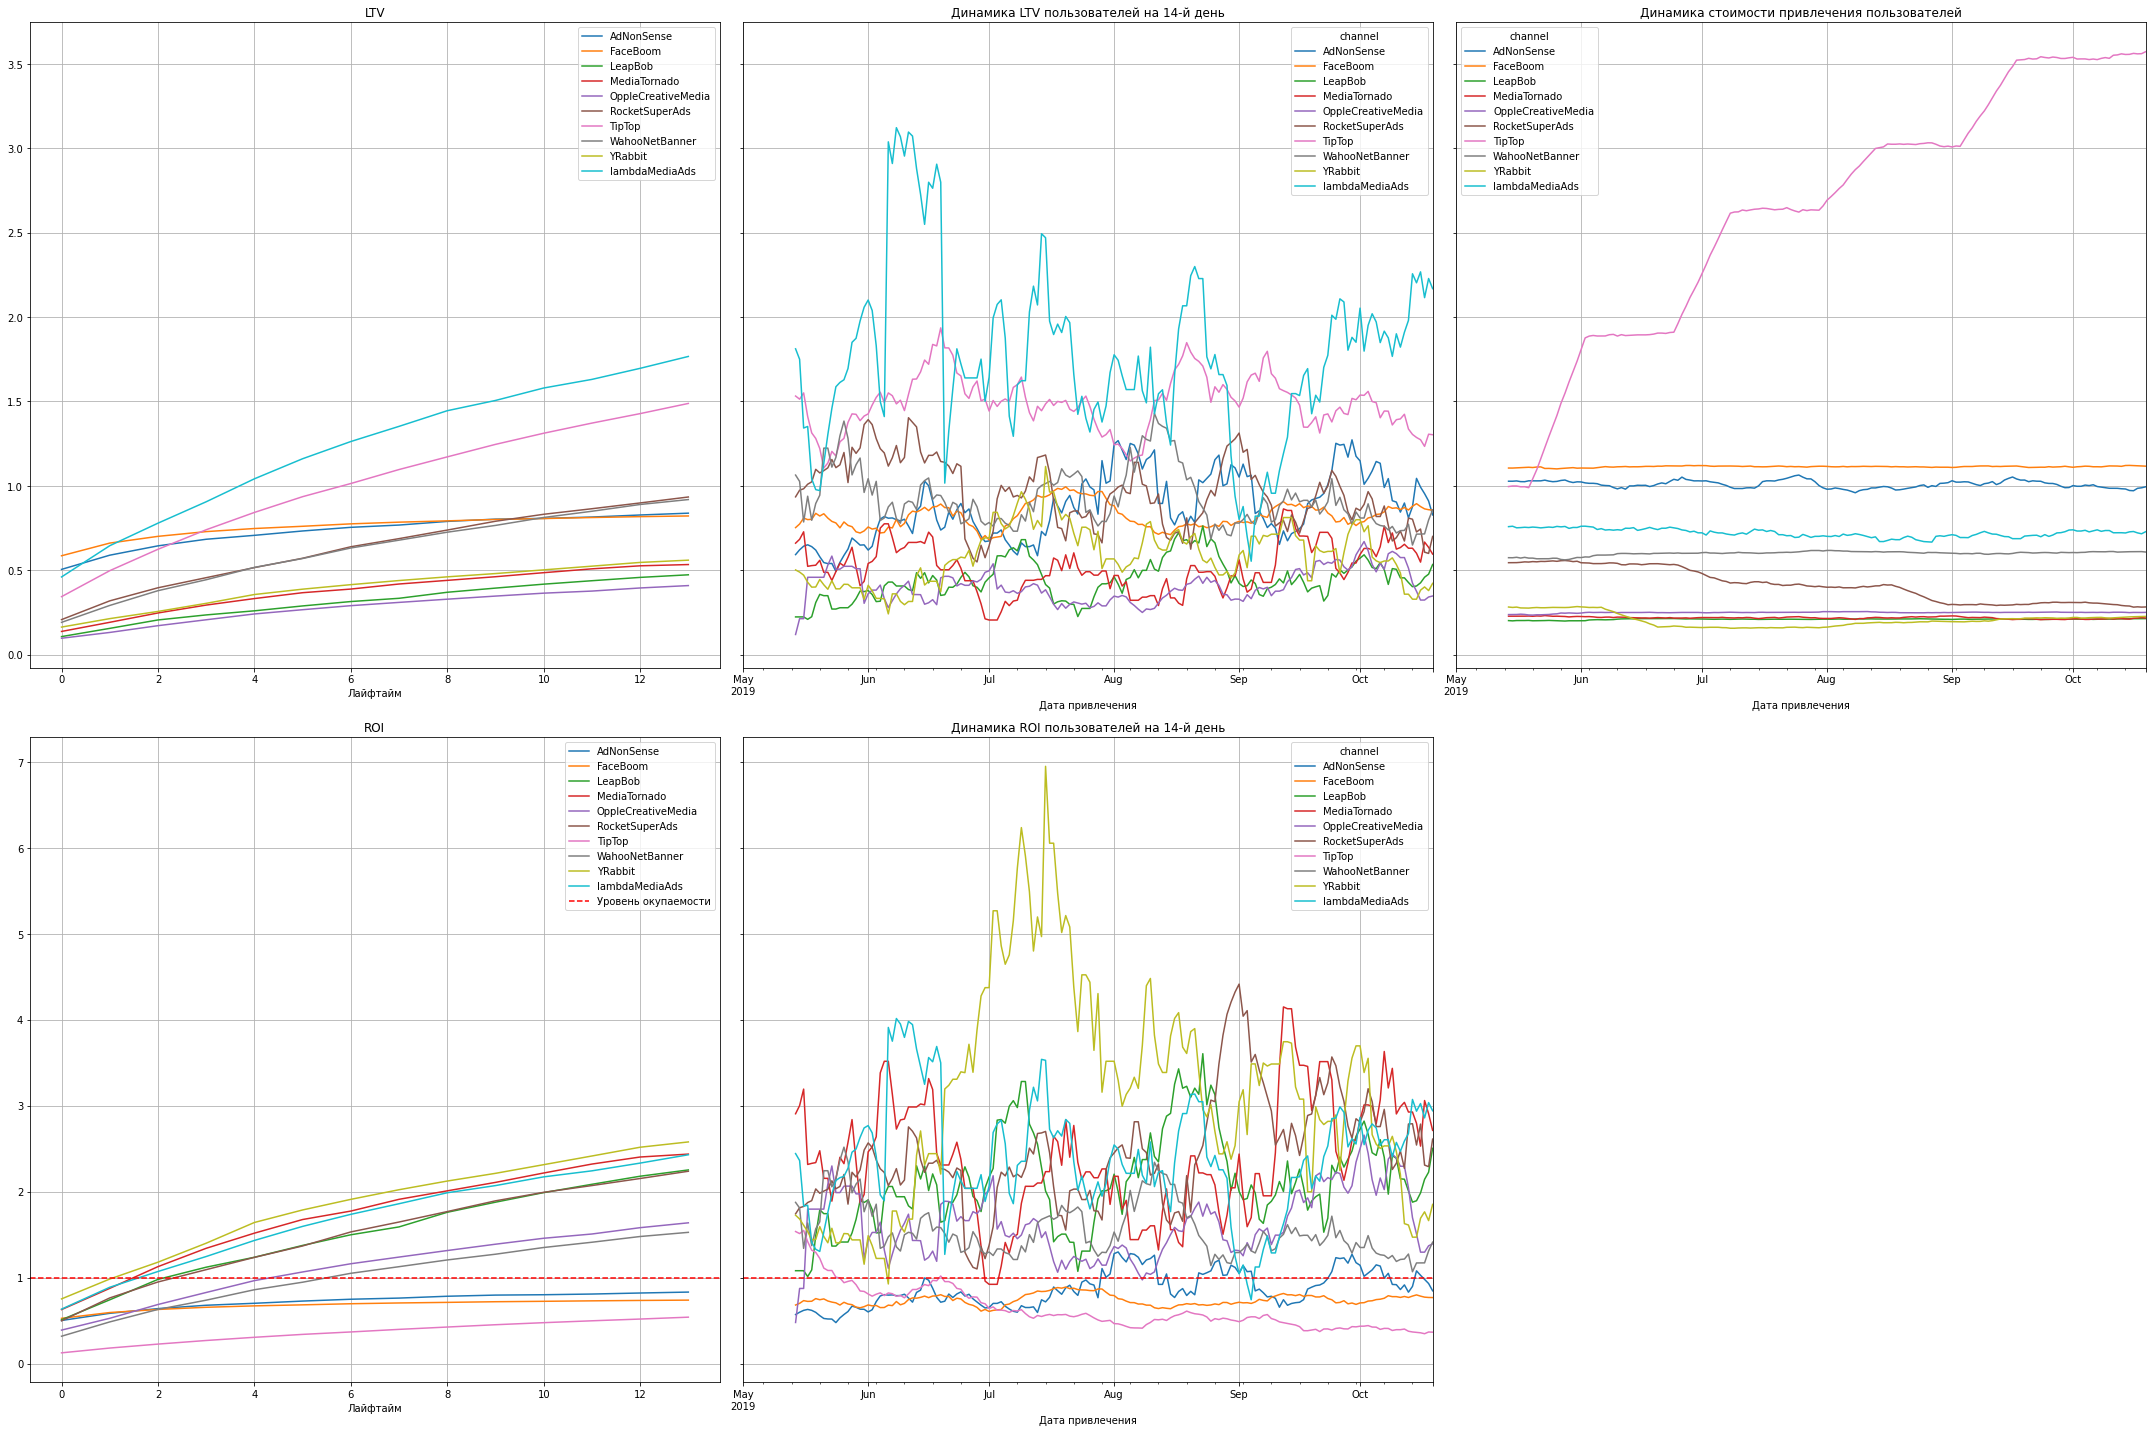

In [58]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


- Начиная со 2 дня "жизни" стабильно НЕ окупается реклама с Tip Top, FaceBoom, AdNonSense. Учитывая, что у первого самые дорогие клиенты, это не удивительно. Но вот  FaceBoom - приносит больше всего платящих пользователей, а при этом реклама этого канала не окупается.
- "Пожизненная ценность" клиентов больше всего у LambdaMediaAds и Tip Top. 
- САС стабилен на всех источниках, кроме Tip Top. Судя по графику, в этотом канале привлечения стабильно увеличивали стоимость инвестиций, которые не приносили "плодов".
- Даже в динамике ROI видно что Tip Top и FaceBoom даже ни разу не пересекают уровень окупаемости. 

### Конверсия и Удержание

In [59]:
#посмотрим что по удержанию
retention.head()

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
dt,,,,,,,,,,,,,,,
2019-05-01,909,1.0,0.204620,0.089109,0.064906,0.039604,0.030803,0.029703,0.023102,0.026403,0.017602,0.016502,0.019802,0.013201,0.008801
2019-05-02,758,1.0,0.200528,0.118734,0.056728,0.046174,0.027704,0.023747,0.023747,0.017150,0.011873,0.021108,0.014512,0.019789,0.010554
2019-05-03,849,1.0,0.190813,0.111896,0.064782,0.042403,0.051826,0.029446,0.028269,0.021201,0.015312,0.016490,0.014134,0.009423,0.011779
2019-05-04,1015,1.0,0.193103,0.106404,0.079803,0.042365,0.029557,0.029557,0.017734,0.025616,0.017734,0.017734,0.019704,0.008867,0.016749
2019-05-05,970,1.0,0.203093,0.106186,0.075258,0.041237,0.028866,0.024742,0.022680,0.016495,0.007216,0.015464,0.011340,0.015464,0.008247


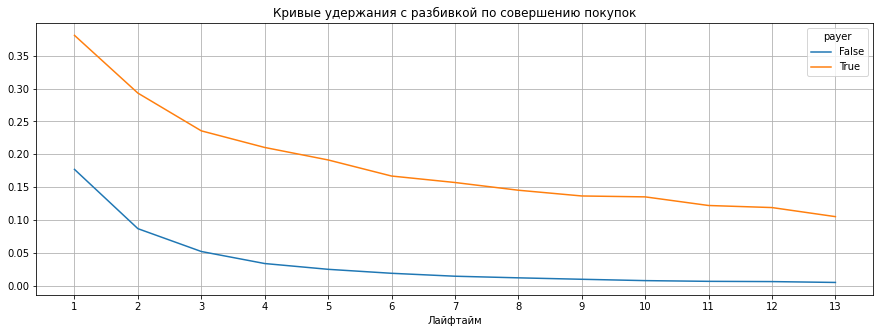

In [60]:
retention_raw, retention = get_retention_d(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['payer']
)  # передаём параметру dimensions столбец payer

report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по совершению покупок')
plt.show()

Удержание платящих значительно выше удержания неплатящих. Так бывает почти всегда, поэтому разбивка пользователей на платящих и неплатящих — стандартная практика.

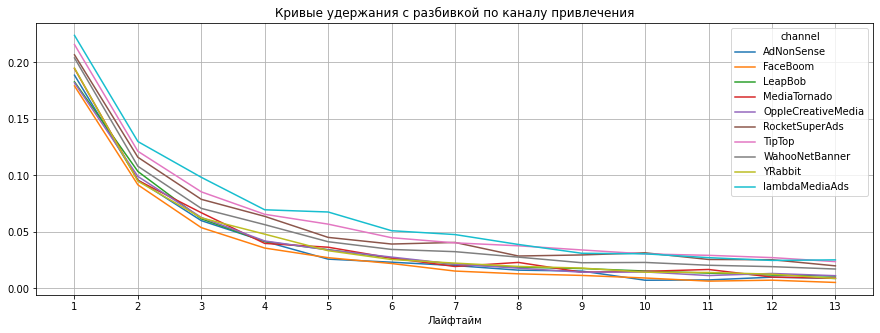

In [61]:
profiles = profiles.query('channel != "organic"')
retention_raw, retention = get_retention_d(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)  

report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по каналу привлечения')
plt.show()

- Все каналы примерно на одном уровне, нет явных "выскочек". 
- У Lambda удержание выше всех.
- Я бы исключила возможну проблему в удержании из-за каналов

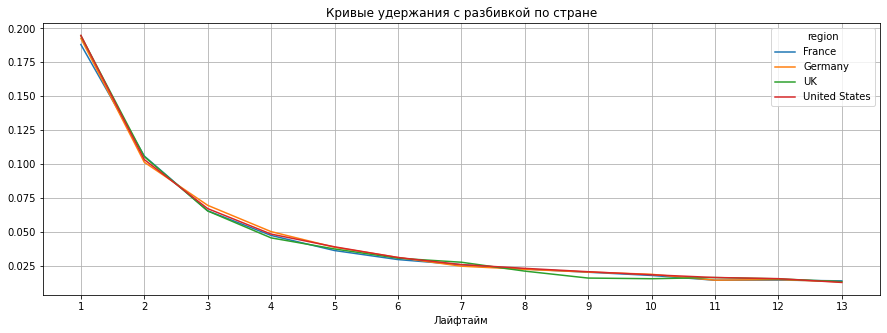

In [62]:
profiles = profiles.query('channel != "organic"')
retention_raw, retention = get_retention_d(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)  

report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по cтране')
plt.show()

- На графике видно, что все страны идут почти в ровень.
- Причина явно не в удержании относительно стран

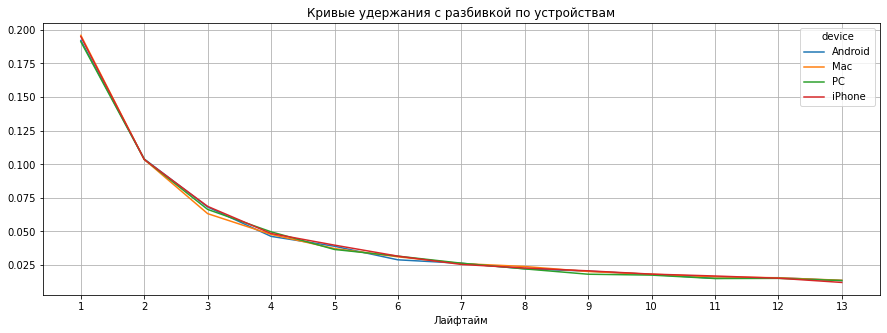

In [63]:
profiles = profiles.query('channel != "organic"')
retention_raw, retention = get_retention_d(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)  

report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по устройствам')
plt.show()

- Здесь такая же картина. Поэтому удержание никак не относится к проблемам с убытками компании. 


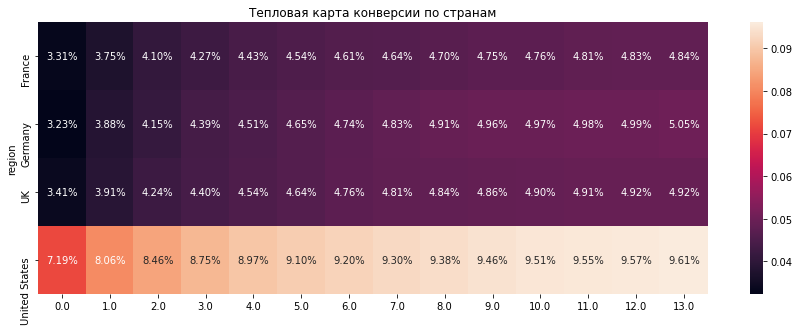

In [64]:
# получаем сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)
# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по странам')
plt.show() 

По графику можно сделать такие выводы:

- Выше всего конверсия у посетителей из United States: более 7,1% новых пользователей совершают покупки в день первого посещения, а к четырнадцатому дню «жизни» доля покупателей почти достигает 10%.
- Хуже всего конвертируются пользователи из Германии и Франции: конверсия первого дня ниже у Германии — около 3,2%. Обе страны примерно на одних показателях. К концу периода конверсия францкзский пользователей отстаёт от лидера почти на 5%.

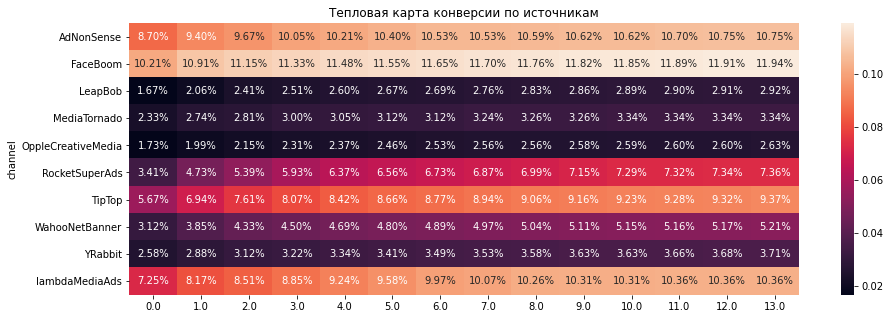

In [65]:
# получаем сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)
# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по источникам')
plt.show() 

- Выше всего конверсия в первый день у FaceBoom, а ниже у OppleCreativeMedia
- К концу периода конверсия все так же выше у FaceBoom.
- Прогрессирующий канал: LambdaMediaAds, Tip Top, AdNonSense, RocketSuperAds
- Снижения конверсии нет 
- На четырнадцатый день "жизни" в лидерах три канала: FaceBoom, LambdaMediaAds, AdNonSense

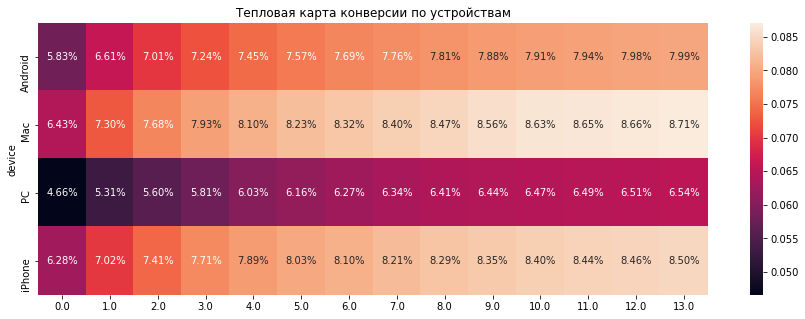

In [66]:
# получаем сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)
# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по устройствам')
plt.show() 

- Выше всего конверсия в первый день у пользователей с iPhone, а ниже у PC
- К концу периода конверсия выше у Mac.
- Снижения конверсии нет
- На четырнадцатый день "жизни" в лидерах: Mac и iPhone. У них же есть заметный прогресс на всем пути
- Но в целом разница не сильно велика, поэтому я бы не рассматривала вообще устройства как возможный "пробел"

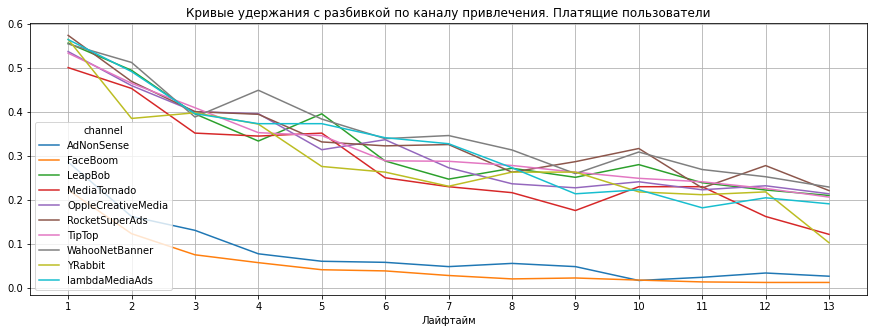

In [67]:
profiles = profiles.query('channel != "organic"')
profiles = profiles.query('payer == True')
retention_raw, retention = get_retention_d(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)  

report = retention.drop(columns=['cohort_size', 0])

report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по каналу привлечения. Платящие пользователи')
plt.show()

- Если рассмотреть графики только на платящих пользователей, то видно, что Face, AdNon отстают очень сильно и к концу периода их удержание почти равно нулю.
- К концу периода удержание выше всего у Rocket и Wahooo

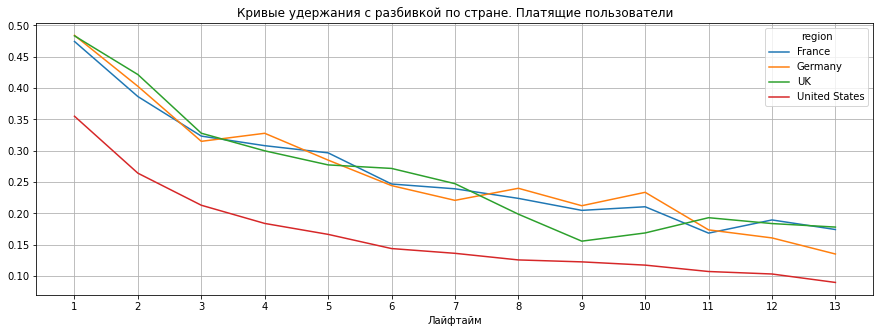

In [68]:
profiles = profiles.query('channel != "organic"')
profiles = profiles.query('payer == True')
retention_raw, retention = get_retention_d(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)  

report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по cтране. Платящие пользователи')
plt.show()

Агааааа...удержание платящих пользователей у США "на дне". А вот Франция и Великобритания удерживают лучше.

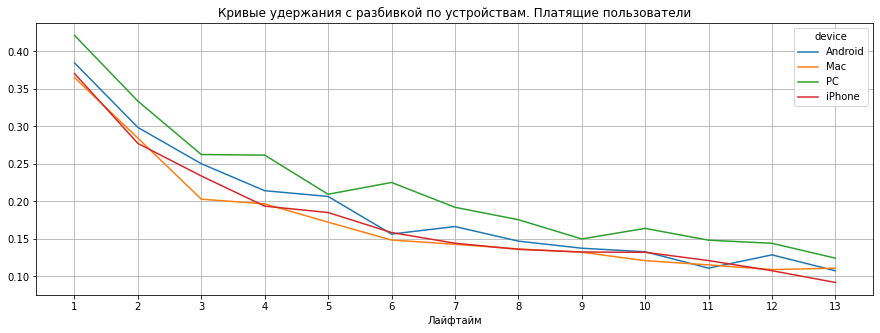

In [69]:
profiles = profiles.query('channel != "organic"')
profiles = profiles.query('payer == True')
retention_raw, retention = get_retention_d(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)  

report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по устройствам. Платящие пользователи')
plt.show()

По устройствам вопросов нет. Все одинаковы

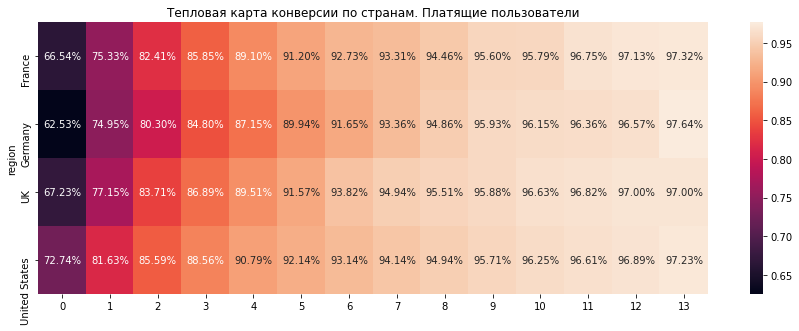

In [70]:
profiles = profiles.query('channel != "organic"')
profiles = profiles.query('payer == True')
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)
# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по странам. Платящие пользователи')
plt.show() 

Конверсия у всех стран примерно одинакова. 

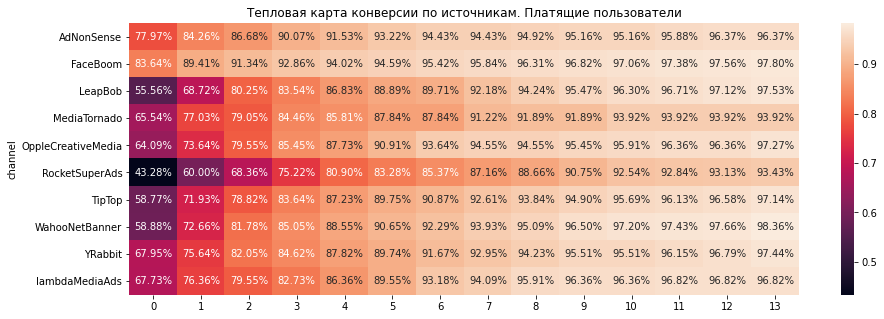

In [71]:
profiles = profiles.query('channel != "organic"')
profiles = profiles.query('payer == True')
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)
# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по источникам. Платящие пользователи')
plt.show() 

Первый день жизни был неоднородный, но к концу периода ситуация хорошая

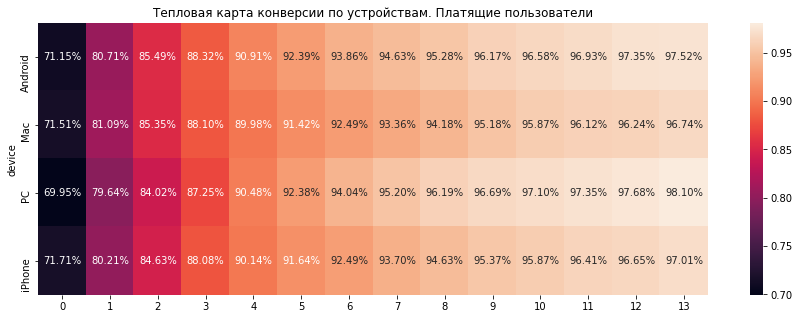

In [72]:
profiles = profiles.query('channel != "organic"')
profiles = profiles.query('payer == True')
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)
# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по устройствам. Платящие пользователи')
plt.show() 

Конверсия никак не относится к проблемам с убытками, а вот удержание да

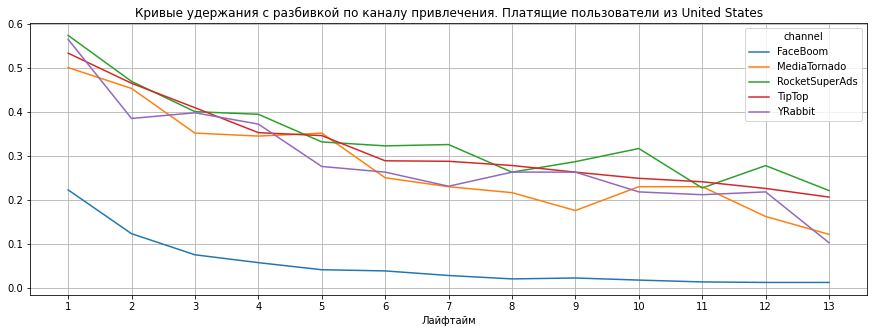

In [73]:
profiles = profiles.query('channel != "organic"')
profiles = profiles.query('payer == True')
profiles = profiles.query('region == "United States"')
retention_raw, retention = get_retention_d(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)  

report = retention.drop(columns=['cohort_size', 0])

report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по каналу привлечения. Платящие пользователи из United States')
plt.show()

## Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

**ВЫВОДЫ**
1. Снизить расходы на канал привлечения - FaceBoom, до уровня возможной окупаемости.
2. Следует снизить расход на Tip Top, слишком большая цена за одного клиента. 
3. Необходимо провести анализ каналов привлечения, почему именно два канала стабильно приносят убытки
4. Компании стоит пересмотреть план на привлечение новых пользователей и не увеличивать бюджет без необходимости. Необходимо прописывать цель и рассчитывать разный бюджет на каждый источник в каждой стране, учитывая устройство.
5. На мой взгляд рекламные компании не управлялись, в них "вливали" бюджет исходя из потенциально возможной прибыли. Когда на этапе экватора рекламных компаний был скачок пользователей 
6. Для расчета бюджета и планировании следущих рекламных компаний следует сначала разделить рекламу на страны, затем на источники и затем на устройста для достижения наивысших результатов, нацеленных на повышение окупаемости, удержание клиентов, увеличение дохода и снижению стоимости привлечения


7. Все пользователи (платящие+неплатящие) удерживаются абсолютно одинаково, не зависимо от любых факторов
8. Следует пересмотреть рекламу в United States, чтобы снизить там затраты на рекламу, но при этом не потерять конверсию.


9. Удержание платящих пользователей под угрозой. Нужно уделить больше внимания пользователям из США. 
10. Удержание платящих выше всего у Rocket и Wahooo. Можно детально изучить эти каналы в каждой стране и, при хорошем результате, увеличить бюджет на этих площадках. 
11. Например, Rocket лучше всего удерживает пользователей из США, а вот Face очень плохо